<a href="https://colab.research.google.com/github/WxTan000/AI_Class_Ugrad_Pub/blob/main/wht7vk_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Comparison of Regression Models on Predicting Medical Costs

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![Medical Cost](https://creditkarma-cms.imgix.net/wp-content/uploads/2018/04/boomers-gen-x-high-cost-medical-care.jpg)
In this assignment, you will implement some learning models in the context of a **regression** problem in the [Medical Cost Personal Dataset on Kaggle](https://www.kaggle.com/mirichoi0218/insurance). Specifically, you will attempt to predict the medical cost billed by health insurance using other provided patient's data. For references, you may refer to [my slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit#slide=id.p) or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same folder as this file. 

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.


***
##  Task 1: SEE THE BIG PICTURE
Write a paragraph explaining the context of the problem in which you are trying to investigate. We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing value?
 * What are some basic statistics you can learn right away about this dataset?

In [ ]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

filename = r"insurance.csv"

# Your code goes here for this section, make sure you also include the output to answer the above questions.
insurance_data = pd.read_csv(filename)

insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


After a preliminary examination of the data in insurance.csv, we concluded that the file's size was 55 KB, or 0.055 MB. The file itself contains, as stated above, 1338 entries with 7 features each. The seven features are age, sex, BMI, number of children, whether or not the subject is a smoker, the region they came from, and the charges they accrued. The last value is the one we are trying to predict. 

Of the fields, three are categorical. They are the subject's sex, whether or not they are a smoker, and the region they came from. There are four quantitative fields, which are age, BMI, number of children, and the charges accrued. 

A visual examination of the data revealed no missing values. If possible, we can get some statistical values immediately with describe:

In [ ]:
print("Age statistics: ", insurance_data['age'].describe())
print("\nSex statistics: ", insurance_data['sex'].describe())
print("\nBMI statistics: ", insurance_data['bmi'].describe())
print("\nChildren statistics: ", insurance_data['children'].describe());
print("\nSmoker statistics: ", insurance_data['smoker'].describe())
print("\nRegion statistics: ", insurance_data['region'].describe());
print("\nCharges statistics: ", insurance_data['charges'].describe())

Age statistics:  count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Sex statistics:  count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

BMI statistics:  count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

Children statistics:  count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

Smoker statistics:  count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

Region statistics:  count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

Charges stati

As can be seen above, we can get a rundown on the fields' basic statistics. We can confirm that there are no missing values in this case, as all counts match the total of 1338. We can also see averages, medians, and the quartiles - this leads us to see that there may be some outliers, particularly in the charges and the number of children. 

---
##  Task 2: DATA DISCOVERY, CLEANING, AND SCALING 

**Data Discover:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. If your dataset has categorical features, make sure you conver those features into numerical using OneHotEncoder class. 

**Feature Scaling** More importantly, your task is to write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

**Implementation Note:** You will need to integrate the above operations into a Pipeline to process and transform the training data, then use the same pipeline to transform any validation and testing data.

We'll begin by generating histograms of the data. This allows us to see the distribution of our data's quantitative fields. 

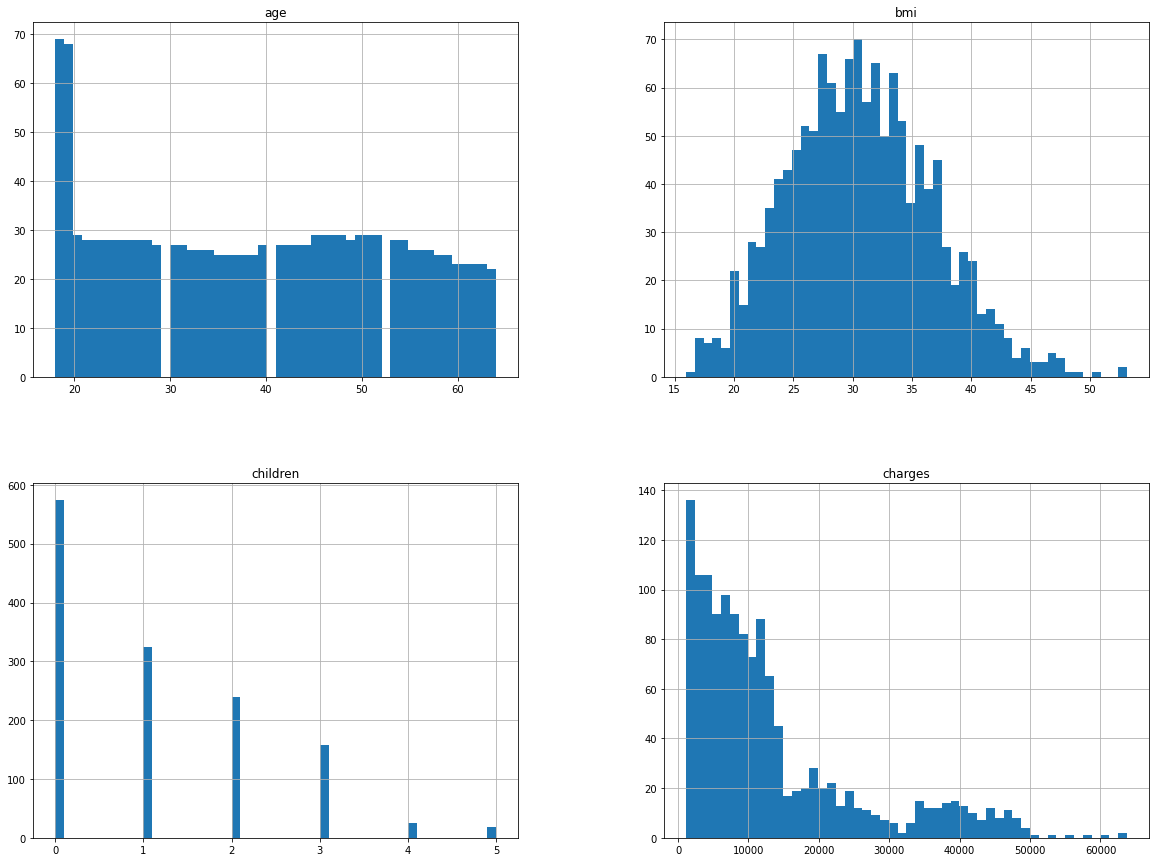

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
insurance_data.hist(bins=50, figsize=(20,15))
plt.show()

As can be seen, BMI seems to be close to a normal distribution. The charges seem to follow a distribution that is significantly skewed to the right. This shape, a massive right skew, seems to be mirrored best by age and number of children. We'll take a closer look below by creating scatterplots for each of the quantitiative variables against charges.

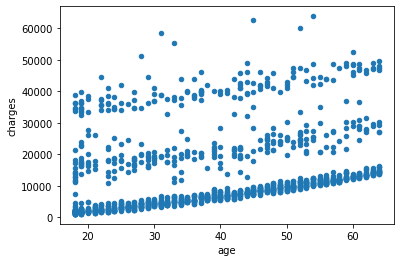

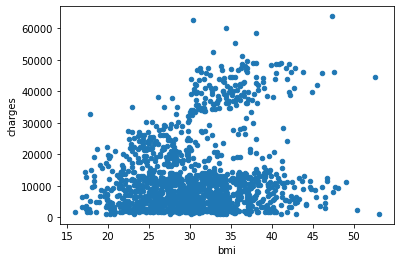

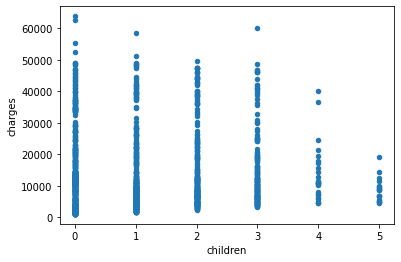

In [ ]:
insurance_data.plot(kind='scatter', x='age', y='charges')
insurance_data.plot(kind='scatter', x='bmi', y='charges')
insurance_data.plot(kind='scatter', x='children', y='charges')

This looks like a more complex distribution of data that can't be easily explained by just two variables. In this case, we'll color these data points by the categorical variables. In order, we'll plot them in regards to the subject's sex, whether or not they are a smoker, and the region they are in.

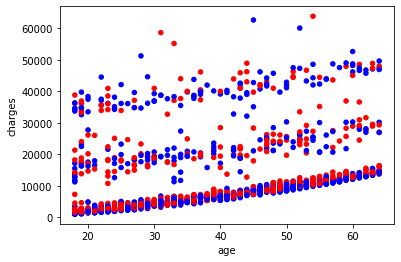

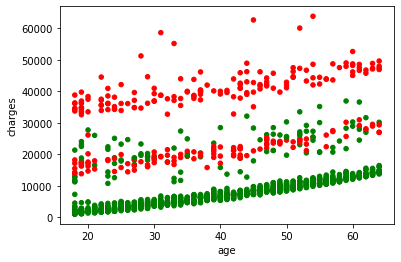

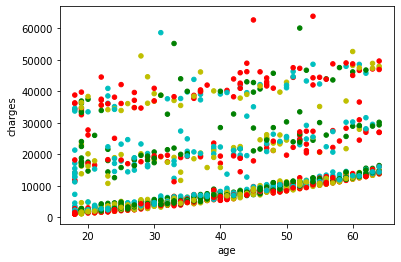

In [ ]:
sex_diff = insurance_data['sex'].map({'male':'b', 'female':'r'})
smoke_diff = insurance_data['smoker'].map({'yes':'r', 'no':'g'})
region_diff = insurance_data['region'].map({'northeast':'c','northwest':'g','southeast':'r','southwest':'y'})
insurance_data.plot(kind='scatter', x='age', y='charges', c=sex_diff)

insurance_data.plot(kind='scatter', x='age', y='charges', c=smoke_diff)

insurance_data.plot(kind='scatter', x='age', y='charges', c=region_diff)


By changing the color of the points depending on each data point's categorical variable values, we can see that there may be a rather strong relationship between age and charges, as well as smoking tendency and charges. Namely, charges increase as age does - and smoking causes charges to be sharply higher irregardless of age. Next, we'll examine the BMI data in the same order as above.

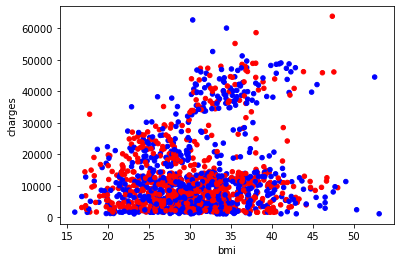

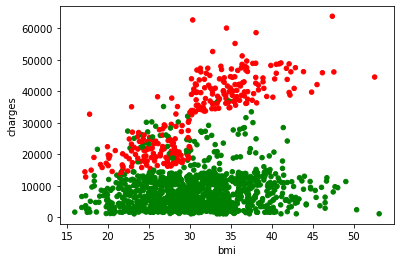

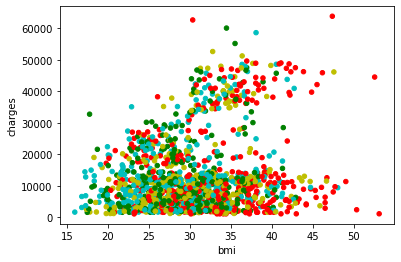

In [ ]:
insurance_data.plot(kind='scatter', x='bmi', y='charges', c=sex_diff)

insurance_data.plot(kind='scatter', x='bmi', y='charges', c=smoke_diff)

insurance_data.plot(kind='scatter', x='bmi', y='charges', c=region_diff)

Again, while BMI (as well as region and sex) may not really have as significant of an impact of charges, whether or not they are smoking once again appears as a significant factor on how large the charges are. Next, while it may appear redundant, we'll plot the relationship of number of children to charges in the same order.

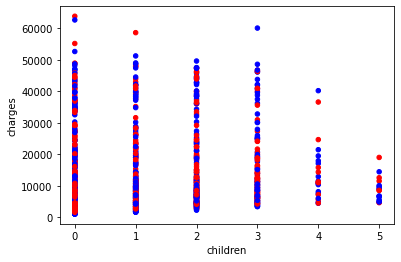

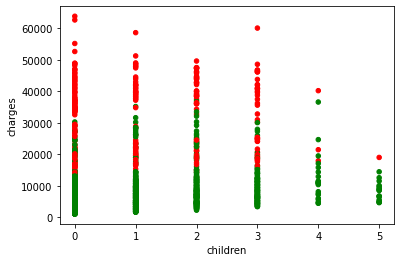

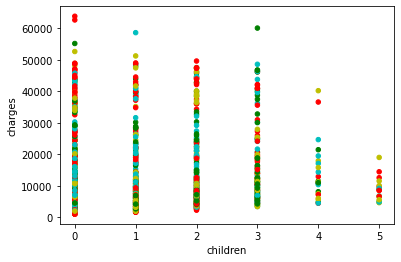

In [ ]:
insurance_data.plot(kind='scatter', x='children', y='charges', c=sex_diff)

insurance_data.plot(kind='scatter', x='children', y='charges', c=smoke_diff)

insurance_data.plot(kind='scatter', x='children', y='charges', c=region_diff)

Our previous assumptions are confirmed once again. We can now conclude that the most significant influences on charges, and thus the features we can expect to be weighted most, are the age of the subject and whether or not the subject smokes. All the other features seem to have less correlation. Now that we have our expectations set, let's clean the data and prepare it for the regression functions by scaling it and transforming our categorical values into numerical ones.

We'll also add the bias bit right now, while modifying the X_train and X_test datasets remains convenient.

In [ ]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


train_set, test_set = train_test_split(insurance_data, test_size=0.2, random_state=42)

insurance = train_set.drop('charges', axis=1)
insurance_results = train_set['charges'].copy()

#Let's begin to create the pipeline. We don't need a combined attributes adder as we don't need any combined attributes for now.
#We'll just use our standard scaler and median imputer if there are erroneous missed values. Currently, however, everything seems to be in order.

num_attribs = ['age', 'bmi', 'children']
cat_attribs = ['sex', 'smoker', 'region']

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

num_unscaled_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

full_unscaled_pipeline = ColumnTransformer([
        ("num", num_unscaled_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])


# Your code goes here for this section.
X_train = full_pipeline.fit_transform(train_set.drop('charges', axis=1));
y_train = train_set['charges'].copy();
X_test = full_pipeline.fit_transform(test_set.drop('charges', axis=1));
y_test = test_set['charges'].copy();

#At this point, let's just add the bias bit right now.
trainShape = X_train.shape;
X_train = np.c_[np.ones((trainShape[0], 1)), X_train]
testShape = X_test.shape;
X_test = np.c_[np.ones((testShape[0], 1)), X_test]

y_train = y_train.to_numpy();
y_test = y_test.to_numpy();

y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

- - -
## Task 3. IMPLEMENT GRADIENT DESCENT 
The gradient descent formulation remain the same as one in the lecture. Keep in mind that you will need to add a column $\textbf{x}_0$ with all 1s as part of the training data. You should write code to implement the **MyLinearRegression** class and its predefined methods. 

**Gradient Descent:** Notes that you may NOT call the library linear regression which defeats the purpose of this assignment. Make sure your code is well-vectorized.

In [ ]:
# NOTE: You may not use the library Linear Regression, but implement your own!
# REMEMBER to place self.attribute = [] with value from your implementation

class MyLinearRegression:
  """
  Define what a linear regressor can do
  """

  def __init__ (self):
    """
    Initialize the regressor
    """
    self.theta = []; # parameter vector;
    self.alpha = []; # learning rate
    self.cost  = []; # cost function

  def gradientDescent(self, X_train, y_train, theta, alpha, iters):

    trainSize = len(X_train)

    for iter in range(iters):
      grad = (2/trainSize) * X_train.T.dot((X_train.dot(theta) - y_train))
      theta = theta - alpha * grad;

    #The cost function J, in this case, is identical to the mean-squared error, or MSE. 
    final_MSE = 1/trainSize * (X_train.dot(theta) - y_train).T.dot(X_train.dot(theta) - y_train);
    self.cost = final_MSE[0][0];
    return theta, final_MSE[0][0];

  def fitUsingGradientDescent(self, X_train, y_train):
    """
    Train the regressor using gradient descent
    """

    self.theta, self.cost = self.gradientDescent(X_train, y_train, self.theta, self.alpha, 100);



  def fitUsingNormalEquation(self, X_train, y_train):
    """
    Training using the Normal (close form) equation
    """
    # implementation code here for Task 4.

    X_b = X_train;
    y = y_train;

    new_theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    self.theta = new_theta;
    self.cost = (1/len(X_train)) * (X_train.dot(self.theta) - y_train).T.dot(X_train.dot(self.theta) - y_train)

  def predict(self, X_test):
    """
    Predicting the label
    """
    y_predict = X_test.dot(self.theta)
    return y_predict

  def __str__(self):
    """
    Print out the parameter out when call print()
    """
    return("Parameter vector is %f" % self.theta)
    
# Your code goes here to call the instance of class MyLinearRegression
myGradientDescentModel = MyLinearRegression()
myGradientDescentModel.theta = np.random.randn(X_train.shape[1],1);
myGradientDescentModel.alpha = 0.1;
myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)    
myGradientDescentModel.cost

37278672.38618449

While rudimentary, the implementation was similar to the one in the lecture. A theta vector full of random values was chosen and was modified as according to the gradient, the derivative of the error function. 

At the end, we ended up with a mean-squared error of ~37,000,000 which doesn't seem to be well off the mark; sklearn's own linear regression implementation arrives at a mean-squared error of ~33,660,000. This once again confirms that we can't easily explain the relationship with the fields and the charges with this model and the relationship may not be linear in nature. 

We can now examine how much influence each field had over the predictions.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


from sklearn.metrics import mean_squared_error

insurance_predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, insurance_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mse,lin_rmse,lin_reg.intercept_, lin_reg.coef_

(33661031.362841904,
 5801.812765234837,
 array([1.6237141e+17]),
 array([[ 0.00000000e+00,  3.63158096e+03,  2.02470321e+03,
          5.10171786e+02, -1.81841959e+17, -1.81841959e+17,
          2.29665931e+16,  2.29665931e+16, -3.49604383e+15,
         -3.49604383e+15, -3.49604383e+15, -3.49604383e+15]]))

While it may not be the purpose of this assignment, it was interesting to compare the implementation on this assignment to that of sklearn. As can be seen, the MSE may be better - but is not a world of difference, meaning that our implementation, as inefficient as it may be, was sort of accurate. 

We have to acknowledge that, again, the relationships between all the fields and the charges accrued probably can't be modeled accurately with a linear regression algorithm, as can be seen by even sklearn's implementation having large error values. They are probably more complex. 

In [ ]:
theta_archive = myGradientDescentModel.theta
theta_archive

array([[ 9016.06650982],
       [ 3614.17580606],
       [ 2031.00951187],
       [  518.05637217],
       [ 4512.90903846],
       [ 4504.42782882],
       [-7282.6400569 ],
       [16301.06142373],
       [ 2711.93351446],
       [ 2325.14714019],
       [ 2084.38356072],
       [ 1896.23301538]])

The above array of coefficients/weights approximately (as it changes with every run) are that of the following fields:

**Bias/Intercept:** 9000

**Age:** 3600

**BMI:** 2030

**Children:** 515

**Sex, Female:** 4500

**Sex, Male:** 4500

**Smoker, No:** -7300

**Smoker, Yes:** 16300

**Region, Southwest:** 2710

**Region, Southeast:** 2300

**Region, Northwest:** 2050

**Region, Northeast:** 1900

We can draw a few conclusions from these data. First, whether or not someone was a smoker was the biggest influence on the amount of charges. Second, the charges are, after all, slightly influenced by the region of the subject. Third, age seems to have a greater influence than the other quantitiative variables. BMI seems to have a more modest influence and the sex of the subject as well as the number of children both seem to have negligible influences. 

* **Learning Rate:** You will try out different learning rates for the dataset and find a learning rate that converges quickly. If you pick a learning rate, your plot of Cost Function $J(\theta)$ against number of iteration will quickly decay to a small value. This also indicates that your implementation is correct. If your learning rate is too large, the cost function $J(\theta)$ can diverge and blow up. From the below plot, you must be able to report the best learning rate the you found to earn credit for this section.

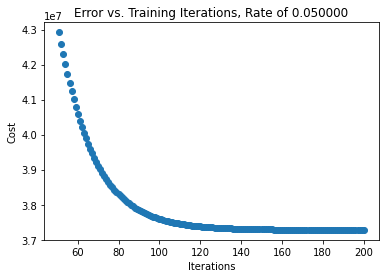

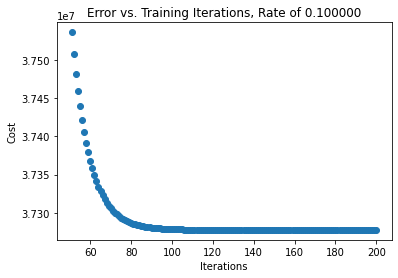

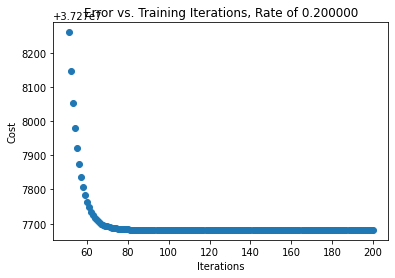

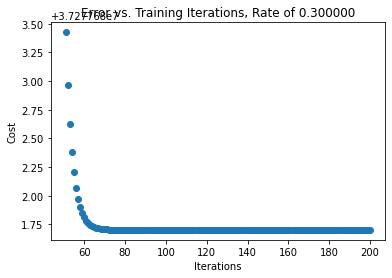

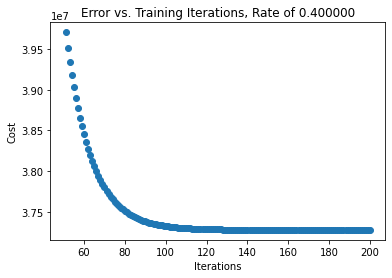

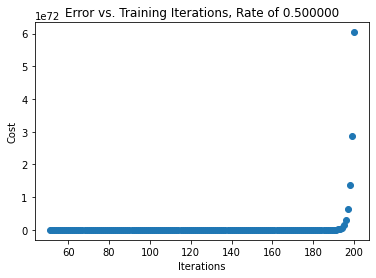

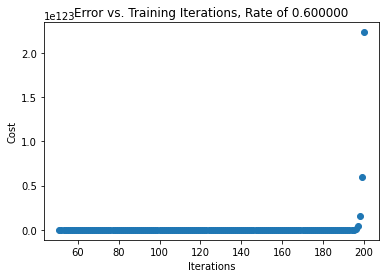

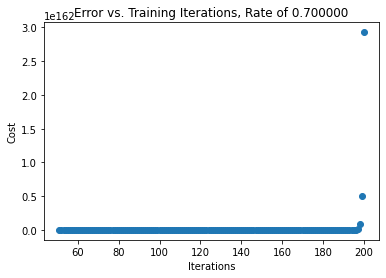

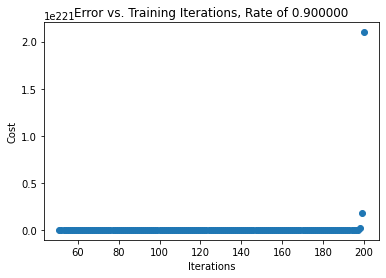

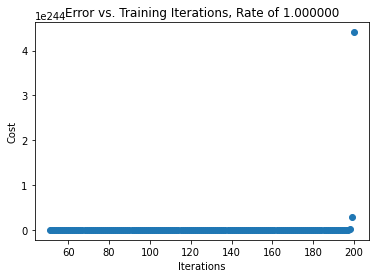

In [ ]:
# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You must plot multiple curves corresponding to different learning rates to justify the best one.
#



iterations = [];
mse = [];
rates = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9, 1]

for rate in rates:
  myGradientDescentModel.alpha = rate; 
  plt.figure();
  plt.xlabel('Iterations')  
  plt.ylabel('Cost')  
  plt.title('Error vs. Training Iterations, Rate of %f' % rate) 
  mse = [];
  iterations = []; 
  for i in range(51,201):
    myGradientDescentModel.theta = np.random.randn(X_train.shape[1],1);
    myGradientDescentModel.gradientDescent(X_train, y_train, myGradientDescentModel.theta, myGradientDescentModel.alpha, i);
    #print(myGradientDescentModel.cost)  
    mse.append(myGradientDescentModel.cost);
    iterations.append(i);

  plt.scatter(iterations, mse);




As can be seen above, a rate greater than or equal to 0.5 causes the regression to run away. When we are looking for the best learning rate, we are looking for the rate that allows faster progression towards the local extrema. Visually, that appears to be the rate of 0.3, as it takes fewer iterations to approach the minimum value for the mean squared error.

- - -
## Task 4. IMPLEMENT THE NORMAL EQUATION

In my lecture, you learn that the closed form solution of linear regression using the normal equation formulation. Using the formula does not require any feature scaling, and should be straight forward to implement: 

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Note that you still need to add a column of 1's to the $\mathbf{
X}$ matrix to have an intercept term.

In [ ]:
# Implement the normalEquation method of the MyLinearRegression Class before execute the code below:

#The X matrix already contains a column of ones, as added above.
#For some reason, even though I gave up and used the implementation from Colab 04, the NormalEquationModel implementation here refuses to output an accurate result.
#There is nothing wrong with my data; there is nothing wrong with my results; every other implementation works perfectly but this does not.
#I do not know why.

myNormalEquationModel = MyLinearRegression()
#myNormalEquationModel.theta = np.random.randn(X_train.shape[1],1);
myNormalEquationModel.alpha = 0.3
myNormalEquationModel.fitUsingNormalEquation(X_train, y_train)

myNormalEquationModel.theta

#print(X_train.T.dot(X_train).dot(myNormalEquationModel.theta))
#print((X_train.T).dot(y_train));

array([[ 71136.29710004],
       [  4069.09322374],
       [  3780.57765333],
       [   256.63530101],
       [-84519.60155031],
       [-44108.64163969],
       [ 10558.638302  ],
       [ 39941.77697998],
       [ 24105.24773293],
       [ 43118.24756297],
       [ 47981.86831813],
       [  7575.17668551]])

The above values don't seem to bode well. Despite a correct implementation in the method, our theta function seems to be abnormally large in magnitude. A preliminary MSE on the training set seems to confirm this issue. 

- - -
## Task 5. COMPARE DIFFERENT IMPLEMENTATIONS 

You should be able to evaluate and compare your gradient descent as well as normal equation implementation of linear regression. In theory, they should be the same, or at least similar. For good measures, you must use the built-in library **Scholastic Gradient Descent (SGD)** as a third model for comparison. For each model, you must compute the RMSE on the **test set** as performance measure. The good news is that you can call library functions to compute these as shown below instead of writing your own code:

* Which one yields the best performance measure for your dataset?
* What is your assessment of the error? Good? Okay? Terrible?

In [ ]:
from sklearn.metrics import mean_squared_error

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor()
mySGDModel.fit(X_train,y_train)
y_predict_SGD = mySGDModel.predict(X_test)

testModel = MyLinearRegression();
testModel.alpha = 0.3
testModel.theta = np.random.randn(X_train.shape[1],1);
testModel.fitUsingGradientDescent(X_train, y_train)

y_predict_GD = testModel.predict(X_test)

testModel.fitUsingNormalEquation(X_train, y_train)

y_predict_NE = testModel.predict(X_test)

mse = mean_squared_error(y_test, y_predict_SGD)
mySGDModel_rmse = np.sqrt(mse)
print(mySGDModel_rmse)

mse = mean_squared_error(y_test, y_predict_GD)
myGradientDescentModel_rmse = np.sqrt(mse)
print(myGradientDescentModel_rmse)

mse = mean_squared_error(y_test, y_predict_NE)
myNormalEquationModel_rmse = np.sqrt(mse)
print(myNormalEquationModel_rmse)




5810.073541447633
5795.332646530042
50166.988675313754


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


As can be seen, while the regular gradient descent functions work - and the implementation on this colab seems to even have a better RMSE than that in SKlearn, the normal equation implementation seems to be absurdly off the mark. While examinations of the code (and even reusing code in Colab 04, which were verbatim with the lecture slides) revealed no obvious error, the normal equation implementation seems to consistently be inaccurate. 

- - -
## Task 6. PRESENT YOUR SOLUTION 

Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/boss). Focus on answering the following: 

* How can you pitch your solution to this project? 
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution.

**Answers About Charges**

We attempted to identify several factors that contributed to the amount of a patient's charges and in turn predict a patient's charges given their presenting factors. While we cannot conclude that there are any obvious and direct relationships between singular factors and the amount of money a patient is charged, we can determine that several factors influence the total amount of charges. In general, we identified that if a patient smoked, their charges would be sharply higher. We also identified that as a patient aged, their charges would increase in turn. Other factors were more negligible. A patient's BMI, sex, region, or number of children were found to not have significant impacts on the amount of charges. 

In conclusion, with the data that we were provided, we cannot definitively predict a patient's bills given the aspects that were provided. We can, however, make a two general conclusions: if a patient smokes, their bills will likely increase, and if a patient is older, their bills will likely be higher than those of younger patients. A patient's BMI may have a weak influence, but BMI is an unreliable statistic health-wise and does not significantly impact bills. 

In order to improve the accuracy of this project, the usual answer would be more data. More data and more features are required to better refine models and predict prices. 

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit?usp=sharing) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](http://bit.ly/cs4774oh)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 1:...".

Best of luck and have fun!